In [1]:
import sounddevice as sd
import keras
from scipy.io import wavfile

import numpy as np
from preprocessing import SoundClip,preprocess_one_clip


Using TensorFlow backend.


In [ ]:
print("***Loading model***")
#Filepath+filename
filepath = r'../model/'+'filbank_only1526901329.969079'
model = keras.models.load_model(filepath)

In [ ]:
recordings = []

In [180]:
####RECORDS AUDIO
sample_rate = 16000
sd.default.samplerate = sample_rate #Set default samplerate to 16000
duration = 1.0  # seconds
plain_myrecording = sd.rec(int(duration * sample_rate), channels=1).reshape(sample_rate,)

#Amplify signal to match training data
myrecording=plain_myrecording*10000 

#Necessary evil for preprocessing
label = "no"
fname = " "
clip = SoundClip(myrecording,sample_rate,label,fname)

x,y = preprocess_one_clip(clip)
x = np.array(x)

x_model = x.reshape(1, 98, 40,1)
pred = model.predict(x_model)
    
#Define mappings for transforming predictions to labels
legal_labels = 'yes no up down left right on off stop go silence unknown'.split()
idxToLabel={index:label for index,label in enumerate(legal_labels)}

#Transform prediction to label-index
pred_idx = np.argmax(pred,axis=1)
print("Pred Vector:",pred)
print("\nPrediction is:",idxToLabel[pred_idx[0]])

In [181]:
sd.play(plain_myrecording)

In [186]:
import IPython
IPython.display.Audio(data=myrecording,rate=sample_rate)

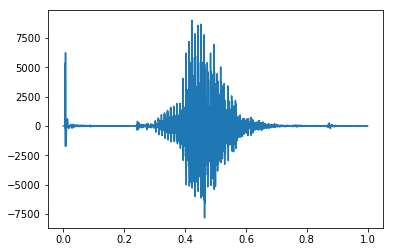

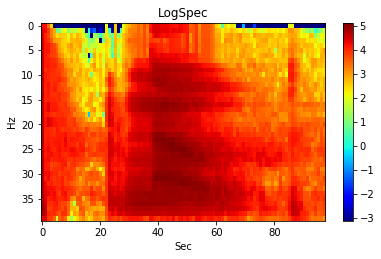

In [165]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#Plot of the raw sound-data
figure = plt.figure()
plot=figure.add_subplot(111)
time = np.linspace(0,len(myrecording)/sample_rate,num=(len(myrecording)))
plt.gray()
plot.plot(time,myrecording)
plt.show()

#Plot spectrograms
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(222)
ax1.set_title('LogSpec')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Sec')
im1 = ax1.imshow(np.flipud(x[0].T), aspect='auto',cmap=cm.jet)
fig.colorbar(im1)
plt.show()

/Users/adrian/Documents/GitHub/Speech-Recognition-Challenge/src/trialFilterBank.py:85: RuntimeWarning: invalid value encountered in log
  spectrogram = np.log(spectrogram)


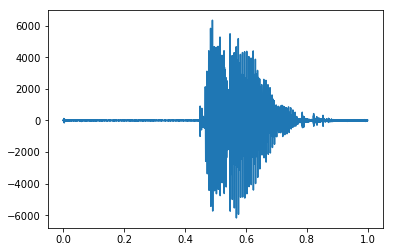

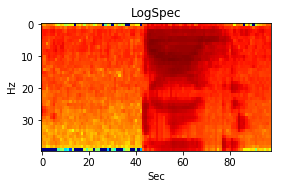

In [166]:
### Comparing from one from dataset
datapath = '../data/train/audio/dog/'
filename = '0a7c2a8d_nohash_0.wav'
#filename = 'doing_the_dishes.wav'
path = datapath+filename
_, sample_signal = wavfile.read(path)

clip_val = SoundClip(sample_signal,sample_rate,label,fname)

x_val,y_val = preprocess_one_clip(clip_val)
x_val = np.array(x_val)

#Raw sound data
figure = plt.figure()
plot=figure.add_subplot(111)
time = np.linspace(0,len(sample_signal)/sample_rate,num=(len(sample_signal)))
plt.gray()
plot.plot(time,sample_signal)
plt.show()

#Plot spectrograms
fig2 = plt.figure(figsize=(14, 8))
ax1 = fig2.add_subplot(333)
ax1.set_title('LogSpec')
ax1.set_ylabel('Hz')
ax1.set_xlabel('Sec')
im1 = ax1.imshow(x_val[0].T, aspect='auto',cmap=cm.jet)
fig.colorbar(im1)
plt.show()

Pred Vector: [[ 0.04465265  0.03567944  0.05318642  0.04904871  0.02344385  0.02792361
   0.03778907  0.05557916  0.07731323  0.07984316  0.03043824  0.48510244]]